In [1]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 81.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 1.1 MB/s eta 0:00:00-:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Feature Extraction

## Extractor

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fft import fft
import matplotlib.pyplot as plt

data = pd.read_csv('data/Seizure (1).csv')  
data.columns = ["timestamp", "gyro_x", "gyro_y", "gyro_z"]  

def extract_features(data):
    features = {}
    
    for axis in ['gyro_x', 'gyro_y', 'gyro_z']:
        values = data[axis].values
        
        features[f'{axis}_mean'] = np.mean(values)
        features[f'{axis}_std'] = np.std(values)
        features[f'{axis}_min'] = np.min(values)
        features[f'{axis}_max'] = np.max(values)
        features[f'{axis}_range'] = np.max(values) - np.min(values)
        features[f'{axis}_variance'] = np.var(values)
        features[f'{axis}_skew'] = skew(values)
        features[f'{axis}_kurtosis'] = kurtosis(values)
        features[f'{axis}_rms'] = np.sqrt(np.mean(values**2))
        
        fft_values = fft(values)
        fft_magnitude = np.abs(fft_values)
        
        features[f'{axis}_dominant_freq'] = np.argmax(fft_magnitude[1:]) + 1  # Ignore DC component
        features[f'{axis}_spectral_entropy'] = -np.sum((fft_magnitude**2) * np.log(fft_magnitude**2 + 1e-10)) / len(fft_magnitude)
        features[f'{axis}_energy'] = np.sum(fft_magnitude**2)
    
    return features


## Plot Tester

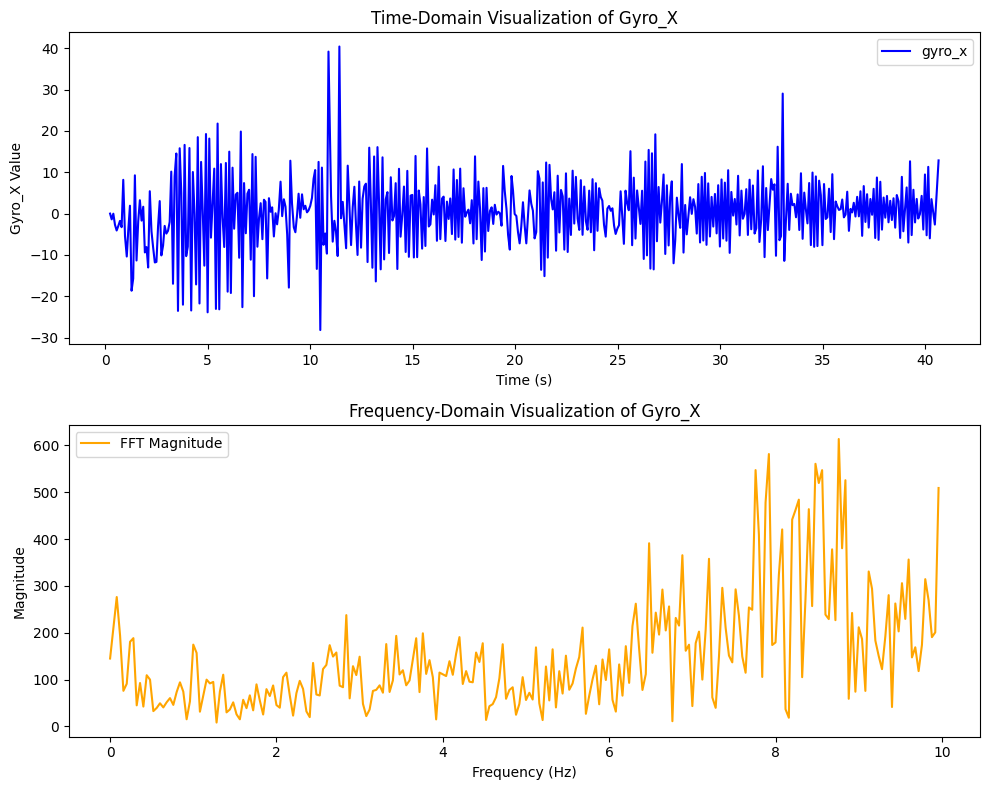

In [ ]:
features = extract_features(data)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(data["timestamp"], data["gyro_x"], color="blue", label="gyro_x")
ax[0].set_title("Time-Domain Visualization of Gyro_X")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Gyro_X Value")
ax[0].legend()

fft_values = fft(data["gyro_x"].values)
fft_magnitude = np.abs(fft_values)
freqs = np.fft.fftfreq(len(fft_magnitude), d=0.05)

positive_freqs = freqs[:len(freqs)//2]
positive_magnitude = fft_magnitude[:len(freqs)//2]

ax[1].plot(positive_freqs, positive_magnitude, color="orange", label="FFT Magnitude")
ax[1].set_title("Frequency-Domain Visualization of Gyro_X")
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Magnitude")
ax[1].legend()

plt.tight_layout()
plt.show()

## Plot to Image Save

In [12]:
import os

input_dir = 'data/'          
output_dir = 'images/Z axis'
os.makedirs(output_dir, exist_ok=True)


for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):

        data = pd.read_csv(os.path.join(input_dir, file_name))
        data.columns = ["timestamp", "gyro_x", "gyro_y", "gyro_z"]
        
        features = extract_features(data)

        fig, ax = plt.subplots(2, 1, figsize=(10, 8))

        ax[0].plot(data["timestamp"], data["gyro_z"], color="blue", label="gyro_z")
        ax[0].set_title("Time-Domain Visualization of Gyro_Z")
        ax[0].set_xlabel("Time (s)")
        ax[0].set_ylabel("Gyro_Z Value")
        ax[0].legend()

        fft_values = fft(data["gyro_z"].values)
        fft_magnitude = np.abs(fft_values)
        freqs = np.fft.fftfreq(len(fft_magnitude), d=0.05)
        positive_freqs = freqs[:len(freqs)//2]
        positive_magnitude = fft_magnitude[:len(freqs)//2]

        ax[1].plot(positive_freqs, positive_magnitude, color="orange", label="FFT Magnitude")
        ax[1].set_title("Frequency-Domain Visualization of Gyro_Y")
        ax[1].set_xlabel("Frequency (Hz)")
        ax[1].set_ylabel("Magnitude")
        ax[1].legend()

        plt.tight_layout()

        output_file_path = os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}.png")
        plt.savefig(output_file_path)
        plt.close(fig) 

        print(f"Saved plot for {file_name} to {output_file_path}")

Saved plot for Sitting (2).csv to images/Z axis/Sitting (2).png
Saved plot for Seizure (3).csv to images/Z axis/Seizure (3).png
Saved plot for Seizure (2).csv to images/Z axis/Seizure (2).png
Saved plot for Walking (1).csv to images/Z axis/Walking (1).png
Saved plot for Writing.csv to images/Z axis/Writing.png
Saved plot for Sitting (3).csv to images/Z axis/Sitting (3).png
Saved plot for Watching TV.csv to images/Z axis/Watching TV.png
Saved plot for Watching movie.csv to images/Z axis/Watching movie.png
Saved plot for Walking and Fall.csv to images/Z axis/Walking and Fall.png
Saved plot for Playing (1).csv to images/Z axis/Playing (1).png
Saved plot for Having Meal (1).csv to images/Z axis/Having Meal (1).png
Saved plot for Driving Car.csv to images/Z axis/Driving Car.png
Saved plot for Jogging (1).csv to images/Z axis/Jogging (1).png
Saved plot for Sitting and Fall.csv to images/Z axis/Sitting and Fall.png
Saved plot for Running (1).csv to images/Z axis/Running (1).png
Saved plot for

## Feature Save

In [13]:
import os

input_dir = 'data/'

all_features = []

for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):

        filepath = os.path.join(input_dir, filename)
        data = pd.read_csv(filepath)
        data.columns = ["timestamp", "gyro_x", "gyro_y", "gyro_z"]  
        
        features = extract_features(data)
        
        features['label'] = 1 if 'Seizure' in filename else 0
        
        all_features.append(features)

feature_df = pd.DataFrame(all_features)

feature_df.to_csv('extracted_features.csv', index=False)


# Model Train

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  #

data = pd.read_csv('extracted_features.csv')

# Step 2: Separate features and labels
X = data.drop(columns=['label'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

joblib.dump(model, 'seizure_detection_model.pkl')


ModuleNotFoundError: No module named 'pandas'

# Inferencing

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fft import fft
import joblib  

model = joblib.load('seizure_detection_model.pkl')

def extract_features(data):
    features = {}
    
    for axis in ['gyro_x', 'gyro_y', 'gyro_z']:
        values = data[axis].values
        
        features[f'{axis}_mean'] = np.mean(values)
        features[f'{axis}_std'] = np.std(values)
        features[f'{axis}_min'] = np.min(values)
        features[f'{axis}_max'] = np.max(values)
        features[f'{axis}_range'] = np.max(values) - np.min(values)
        features[f'{axis}_variance'] = np.var(values)
        features[f'{axis}_skew'] = skew(values)
        features[f'{axis}_kurtosis'] = kurtosis(values)
        features[f'{axis}_rms'] = np.sqrt(np.mean(values**2))
        
        fft_values = fft(values)
        fft_magnitude = np.abs(fft_values)
        
        features[f'{axis}_dominant_freq'] = np.argmax(fft_magnitude[1:]) + 1  # Had to ignore DC component
        features[f'{axis}_spectral_entropy'] = -np.sum((fft_magnitude**2) * np.log(fft_magnitude**2 + 1e-10)) / len(fft_magnitude)
        features[f'{axis}_energy'] = np.sum(fft_magnitude**2)
    
    return features

new_data = pd.read_csv('data/Sitting and Fall.csv')  
new_data.columns = ["timestamp", "gyro_x", "gyro_y", "gyro_z"]  

new_features = extract_features(new_data)
new_features_df = pd.DataFrame([new_features])  

prediction = model.predict(new_features_df)

if prediction[0] == 1:
    print("Seizure detected")
else:
    print("No seizure detected")


No seizure detected
